In [21]:
# import correct packages

import pandas as pd
import json
import time
import statistics

In [22]:
# read the json file

df = pd.read_json('data.json',lines=True)

In [23]:
# Create a monthly rent array for 2010-2017
monthly_rent = []

# Initialize array element with dictionary which key is the month and value is a list that will have rent data
# for that specific time
for i in range(8):
    monthly_rent.append({'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[],'Dec':[]})

In [24]:
# iterate the data to populate the dictionaries for each bedroom and bathroom type
c = 0
for zpid in df['zpid'].tolist():
    homeValue = df.loc[df['zpid'] == zpid]['data'][c]['HomeValueChartData']
    
    try:
        bedroom = df.loc[df['zpid'] == zpid]['data'][c]['results']['result']['bedrooms']['$']
        bathroom = df.loc[df['zpid'] == zpid]['data'][c]['results']['result']['bathrooms']['$']
    except (TypeError,KeyError):
        c=c+1
        continue
    c = c + 1

    chart = json.loads(homeValue)
    y= {2010:[], 2011:[], 2012:[], 2013:[], 2014:[], 2015:[], 2016:[], 2017:[]}

    # append rent so that it can be averaged later
    # the key is the year from [-4:]
    for i in chart['points']:
        year = int(time.ctime(i['x']/1000)[-4:])
        month = time.ctime(i['x']/1000)[4:7]
        y[year].append(i['y'])
        if bedroom <= 3:
            monthly_rent[year%10][month].append(i['y'])

In [25]:
# Average the rent for each month and each year
for i in range(8):
    for key, value in monthly_rent[i].items():
        if (len(value) != 0):
            monthly_rent[i][key] = statistics.mean(value)

In [26]:
# Print out the data we have
for i in range(8):
    print(monthly_rent[i].values())

dict_values([[], [], [], [], [], [], [], [], 2796.22063941724, 2756.6733306353703, 2711.011165951938, 2733.8935998058096])
dict_values([2654.319038757181, 2668.356258596974, 2687.1267901933816, 2685.9172263128085, 2702.8895541710494, 2729.4904118456184, 2726.1477465814387, 2702.1235536855734, 2695.4904118456184, 2677.0065539283114, 2684.2454082045474, 2680.908164090946])
dict_values([2693.373088437576, 2660.086576583866, 2664.7575855651753, 2682.426571729104, 2718.6142082692772, 2740.5732664455054, 2770.468889068695, 2761.1688647948863, 2739.5601585888826, 2714.1997734444535, 2695.837689133425, 2667.2303584432398])
dict_values([2681.1136014240633, 2694.7377619548506, 2726.426167165628, 2749.2963022898293, 2775.322275264989, 2776.6695525527957, 2814.986892143377, 2819.588397119508, 2804.645278744235, 2821.476171211263, 2810.379075977021, 2787.265393640262])
dict_values([2757.4527874423497, 2780.770774334493, 2809.275507727162, 2795.8875313536696, 2791.904199368881, 2804.8696496480297, 2

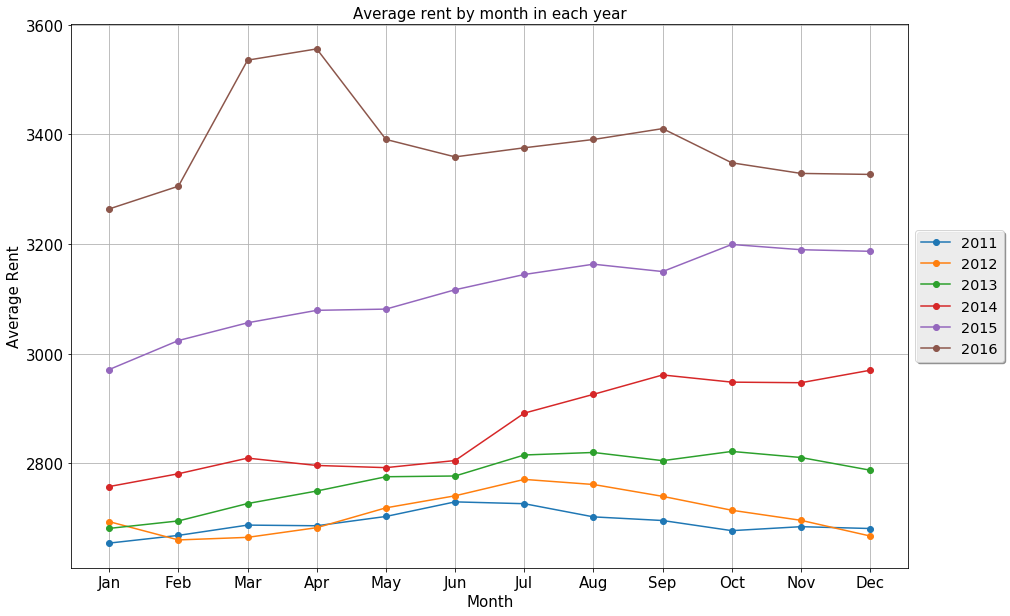

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(1,7):
    ax.plot(range(1,13),list((monthly_rent[i]).values()), 'o-', label= (2010+i))
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
plt.xticks(range(1,13), list((monthly_rent[i]).keys()))
plt.title('Average rent by month in each year')
plt.xlabel('Month')
plt.ylabel('Average Rent')
plt.grid(True)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

In [28]:
month_rent_dev = [0] * 12
for i in range(1,7):
    avg = statistics.mean(monthly_rent[i].values())
    std = statistics.stdev(monthly_rent[i].values())
    for j in range(12):
        month_rent_dev[j] += (list(monthly_rent[i].values())[j] - avg)/std/6

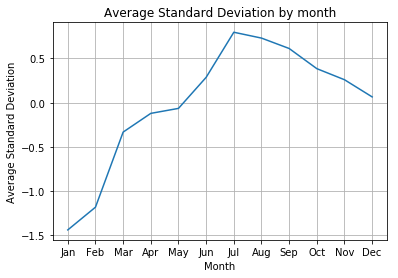

In [29]:
%matplotlib inline
plt.plot(range(1,13),month_rent_dev)
plt.xticks(range(1,13), list((monthly_rent[i]).keys()))
plt.title('Average Standard Deviation by month')
plt.xlabel('Month')
plt.ylabel('Average Standard Deviation')
plt.grid(True)